# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | fale old settlement
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | skiatook
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | glencoe
Processing Record 16 of Set 1 | nuuk
Processing Record 17 of Set 1 | pangoa
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | shimoda
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | hakha
Processing Record 22 of Set 1 | playa de

Processing Record 41 of Set 4 | sungai penuh
Processing Record 42 of Set 4 | banda aceh
Processing Record 43 of Set 4 | sarina
Processing Record 44 of Set 4 | louisville
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | sai buri
Processing Record 47 of Set 4 | taulaga
Processing Record 48 of Set 4 | aitape
Processing Record 49 of Set 4 | luderitz
Processing Record 0 of Set 5 | lorengau
Processing Record 1 of Set 5 | al-hamdaniya
Processing Record 2 of Set 5 | jinchang
Processing Record 3 of Set 5 | fengcheng
Processing Record 4 of Set 5 | gros islet
Processing Record 5 of Set 5 | nadym
Processing Record 6 of Set 5 | walvis bay
Processing Record 7 of Set 5 | grajau
Processing Record 8 of Set 5 | kiruhura
Processing Record 9 of Set 5 | nizhnevartovsk
Processing Record 10 of Set 5 | tachov
Processing Record 11 of Set 5 | tandalti
Processing Record 12 of Set 5 | hirara
Processing Record 13 of Set 5 | kurchatov
Processing Record 14 of Set 5 | cabo san lucas
Pr

Processing Record 34 of Set 8 | howard springs
Processing Record 35 of Set 8 | paita
Processing Record 36 of Set 8 | xining
Processing Record 37 of Set 8 | labasa
Processing Record 38 of Set 8 | elkins
Processing Record 39 of Set 8 | laguna
Processing Record 40 of Set 8 | guli
Processing Record 41 of Set 8 | n'zeto
Processing Record 42 of Set 8 | tanjungtiram
Processing Record 43 of Set 8 | saudarkrokur
Processing Record 44 of Set 8 | iowa park
Processing Record 45 of Set 8 | debre werk'
Processing Record 46 of Set 8 | farkhar
Processing Record 47 of Set 8 | fonadhoo
City not found. Skipping...
Processing Record 48 of Set 8 | fairmont
Processing Record 49 of Set 8 | alice springs
Processing Record 0 of Set 9 | coquimbo
Processing Record 1 of Set 9 | vallenar
Processing Record 2 of Set 9 | bilokurakyne
Processing Record 3 of Set 9 | yonggwang-up
Processing Record 4 of Set 9 | ketchikan
Processing Record 5 of Set 9 | alamosa
Processing Record 6 of Set 9 | qarqaraly
Processing Record 7 of

Processing Record 22 of Set 12 | peterhead
Processing Record 23 of Set 12 | svetlyy
Processing Record 24 of Set 12 | guerrero negro
Processing Record 25 of Set 12 | chernomorskoye
Processing Record 26 of Set 12 | labuan
Processing Record 27 of Set 12 | san andros
City not found. Skipping...
Processing Record 28 of Set 12 | nebbi
Processing Record 29 of Set 12 | juan griego
Processing Record 30 of Set 12 | paciran
Processing Record 31 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 32 of Set 12 | mukah
City not found. Skipping...
Processing Record 33 of Set 12 | boyolangu
Processing Record 34 of Set 12 | rothenburg ob der tauber
Processing Record 35 of Set 12 | tostado
Processing Record 36 of Set 12 | masterton
Processing Record 37 of Set 12 | kirensk
Processing Record 38 of Set 12 | stiens
Processing Record 39 of Set 12 | florence
Processing Record 40 of Set 12 | remire-montjoly
Processing Record 41 of Set 12 | island harbour
Processing Record 42 of Set 12 | 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
0                    grytviken -54.2811  -36.5092     -2.28        94   
1          fale old settlement  -9.3852 -171.2468     27.86        75   
2                      stanley  54.8680   -1.6985     20.44        90   
3  edinburgh of the seven seas -37.0676  -12.3116      9.70        57   
4               margaret river -33.9500  115.0667     14.73        68   

   Cloudiness  Wind Speed Country        Date  
0         100        0.92      GS  1694294767  
1          68        3.22      TK  1694294767  
2          20        2.06      GB  1694294767  
3          88       12.16      SH  1694294768  
4         100        4.96      AU  1694294768

In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
0                          grytviken -54.2811  -36.5092     -2.28        94   
1                fale old settlement  -9.3852 -171.2468     27.86        75   
2                            stanley  54.8680   -1.6985     20.44        90   
3        edinburgh of the seven seas -37.0676  -12.3116      9.70        57   
4                     margaret river -33.9500  115.0667     14.73        68   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        0.92      GS  1694294767  
1                68        3.22      TK  1694294767  
2                20        2.06      GB  1694294767  
3                88       12.16      SH  1694294768  
4               100        4.96      AU  1694294768

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

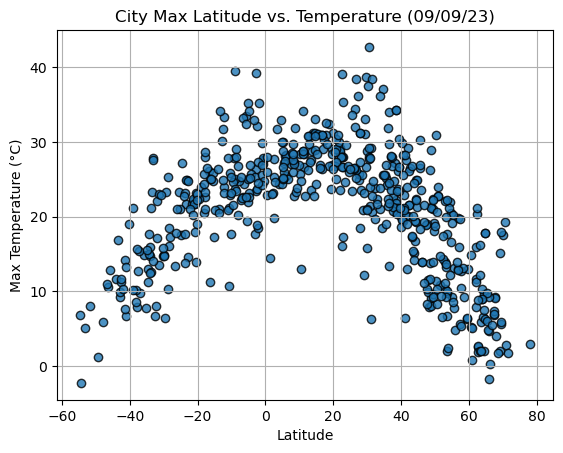

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

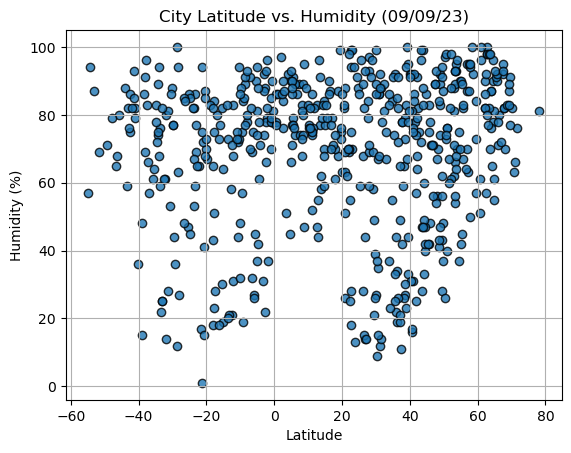

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

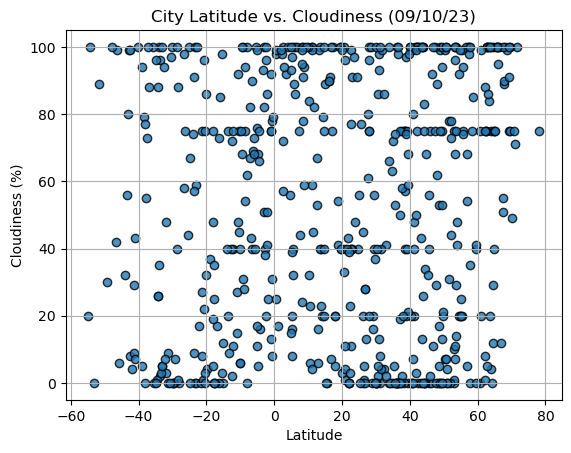

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

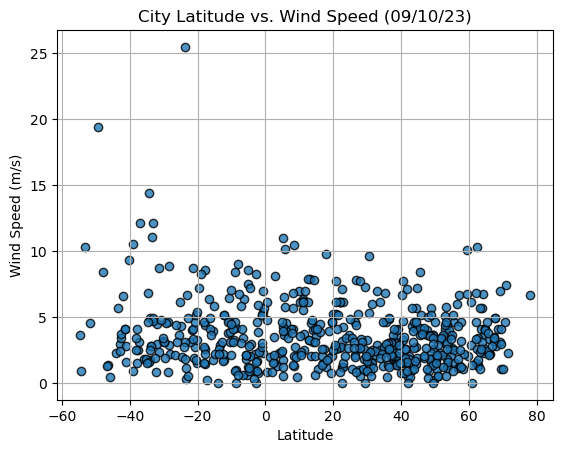

In [35]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_values, y_values, xlabel, ylabel, title, annotate_position):
    """
    Create a scatter plot with linear regression for the given x and y values.
    
    Parameters:
    - x_values, y_values: Data for scatter plot.
    - xlabel, ylabel, title: Labels for the plot.
    - annotate_position: Tuple indicating position for the linear regression equation on the plot.
    """
    
    # Calculate linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(line_eq, annotate_position, fontsize=15, color="red")
    plt.grid(True)
    plt.show()

    # Output the r-value
    print(f"The r-value is: {rvalue}")
 

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
2               stanley  54.8680  -1.6985     20.44        90          20   
5               iqaluit  63.7506 -68.5145      5.85        70          20   
7        ribeira grande  38.5167 -28.7000     22.22        73          75   
9             jamestown  42.0970 -79.2353     20.01        91         100   
10               albany  42.6001 -73.9662     26.44        75         100   

         Wind Speed Country        Date  
City_ID                                  
2              2.06      GB  1694294767  
5              4.12      CA  1694294768  
7              3.13      PT  1694294768  
9              0.45      US  1694294768  
10             0.45      US  1694294768

In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
0                          grytviken -54.2811  -36.5092     -2.28        94   
1                fale old settlement  -9.3852 -171.2468     27.86        75   
3        edinburgh of the seven seas -37.0676  -12.3116      9.70        57   
4                     margaret river -33.9500  115.0667     14.73        68   
6                       invercargill -46.4000  168.3500     10.57        68   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        0.92      GS  1694294767  
1                68        3.22      TK  1694294767  
3                88       12.16      SH  1694294768  
4               100        4.96      AU  1694294768  
6                99        1.34      NZ  1694294768

###  Temperature vs. Latitude Linear Regression Plot

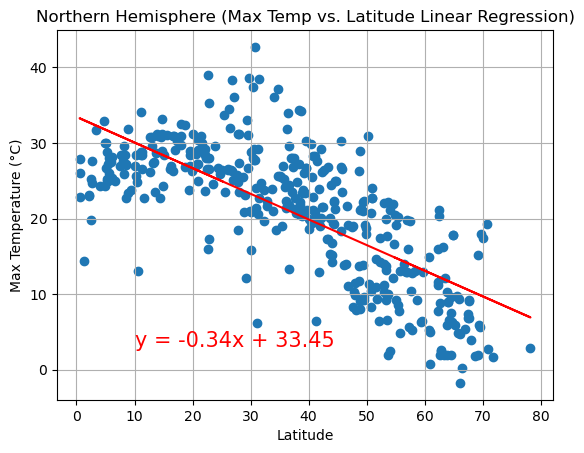

The r-value is: -0.727624316994474


In [59]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
create_linear_regression_plot(x_values, y_values, 
                                     xlabel='Latitude', 
                                     ylabel='Max Temperature (°C)', 
                                     title='Northern Hemisphere (Max Temp vs. Latitude Linear Regression)', 
                                     annotate_position=(10, 3))


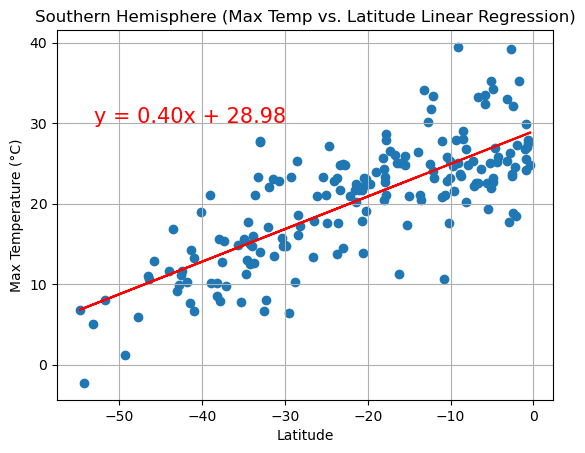

The r-value is: 0.7652433467911062


In [68]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

create_linear_regression_plot(x_values, y_values, 
                             xlabel='Latitude', 
                             ylabel='Max Temperature (°C)', 
                             title='Southern Hemisphere (Max Temp vs. Latitude Linear Regression)', 
                             annotate_position=(-53,30))


**Discussion about the linear relationship:** 

The relationship between temperature and latitude in the Northern hemisphere is such that an increase in the latitude results in a decrease in the temperature. Thus, showing a fairly strong inverse correlation. This is also reflected in the negative r-value obtained. 

In the Southern hemispher, however, an increase in the latitude results in an increase in the temperature. This shows a very strong positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

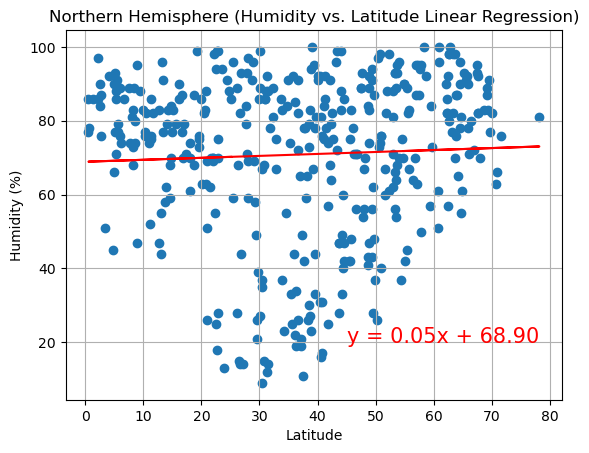

The r-value is: 0.045365895306276


In [70]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
create_linear_regression_plot_final(x_values, y_values, 
                                   xlabel='Latitude', 
                                   ylabel='Humidity (%)', 
                                   title='Northern Hemisphere (Humidity vs. Latitude Linear Regression)', 
                                   annotate_position=(45, 20))

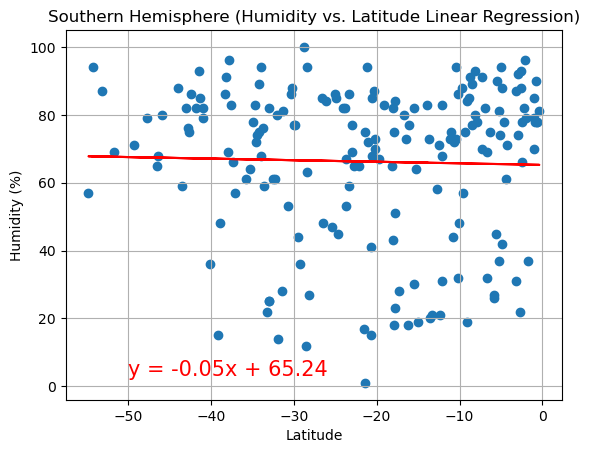

The r-value is: -0.027978332157281332


In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
create_linear_regression_plot_final(x_values, y_values, 
                                   xlabel='Latitude', 
                                   ylabel='Humidity (%)', 
                                   title='Southern Hemisphere (Humidity vs. Latitude Linear Regression)', 
                                   annotate_position=(-50, 3))

**Discussion about the linear relationship:** 

The relationship between latitude and humidity in the Northern hemisphere is such that an increase in the latitude results in a slight trend indicating the likelihood of an increase in humidity. Thus, suggesting a weak positive correlation between humidity and latitude. This is evident in an r-value of 0.045365895306276.

In the Southern hemisphere, the negative r-value suggests very weak negative relationship between latitude and humidity.As latitude increases, there's a slight trend indicating the likelihood of a decrease in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

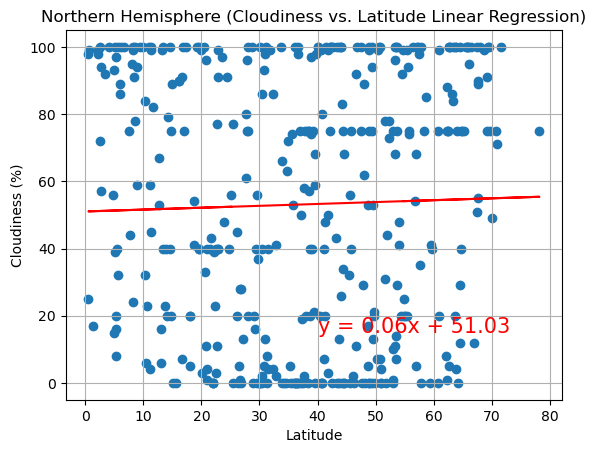

The r-value is: 0.027573979159976853


In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
create_linear_regression_plot_final(x_values, y_values, 
                                   xlabel='Latitude', 
                                   ylabel='Cloudiness (%)', 
                                   title='Northern Hemisphere (Cloudiness vs. Latitude Linear Regression)', 
                                   annotate_position=(40, 15))


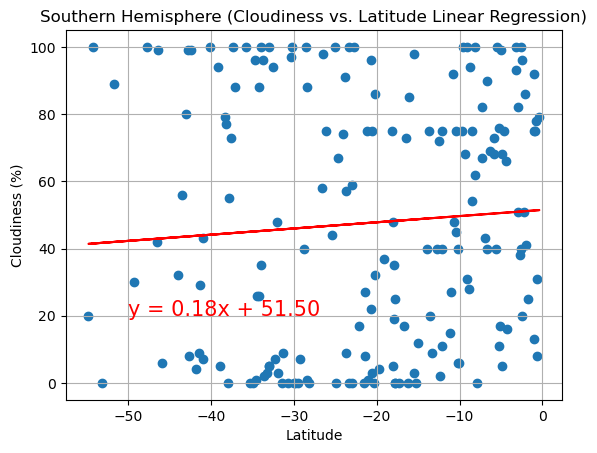

The r-value is: 0.07046615377326386


In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
create_linear_regression_plot_final(x_values, y_values, 
                                   xlabel='Latitude', 
                                   ylabel='Cloudiness (%)', 
                                   title='Southern Hemisphere (Cloudiness vs. Latitude Linear Regression)', 
                                   annotate_position=(-50, 20))


**Discussion about the linear relationship:** 

In the northern hemisphere, there is a very weak positive correlation between latitude and cloudiness. As latitude increases, there's a slight trend indicating an increase in cloudiness. However, as the r-value id close to zero, it suggest that the correlation is minimal. Hence, latitude may not be the key detrminant of cloudiness in the northern hemisphere.

In the Southern hemisphere, the correlation is very weak but slightly stronger correlation than the northen hemisphere. It implies that as latitude increases, the cloudiness increases. In the Southern hemisphere, there is a higher likelihood of latitude being the factor affecting cloudiness when compared with the Northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

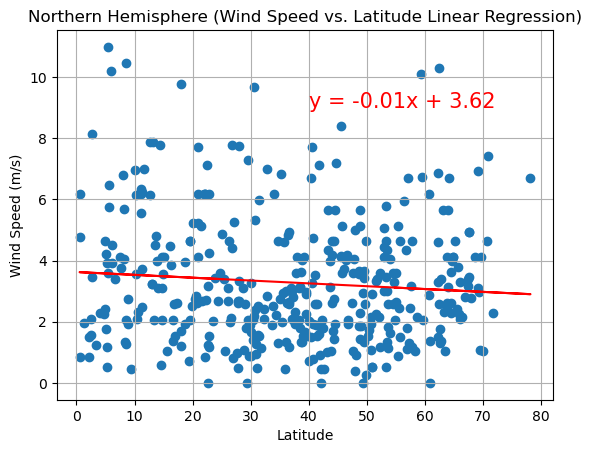

The r-value is: -0.08586912530430695


In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
create_linear_regression_plot_final(x_values, y_values, 
                                   xlabel='Latitude', 
                                   ylabel='Wind Speed (m/s)', 
                                   title='Northern Hemisphere (Wind Speed vs. Latitude Linear Regression)', 
                                   annotate_position=(40, 9))


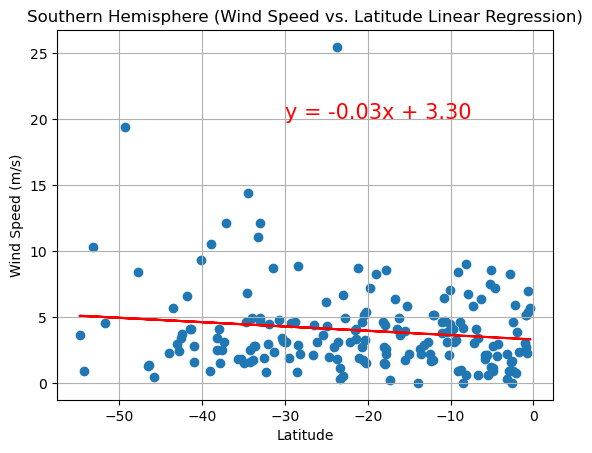

The r-value is: -0.14152872083796916


In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
create_linear_regression_plot_final(x_values, y_values, 
                                   xlabel='Latitude', 
                                   ylabel='Wind Speed (m/s)', 
                                   title='Southern Hemisphere (Wind Speed vs. Latitude Linear Regression)', 
                                   annotate_position=(-30, 20))


**Discussion about the linear relationship:** 

As latitude increases in the Northern hemisphere, there's a slight trend indicating a decrease in wind speed observed. This suggests a  weak negative relationship between wind speed and latitiude. It suggests that while latitude might have some effect on wind speed in the Northern hemisphere, it's not the predominant factor.

As latitude increases in the Southern hemisphere, there's a trend suggesting a decrease in wind speed observed. This suggests a weak negative correlation between wind speed and latitude. While this correlation is still weak, it's slightly stronger than in the Northern Hemisphere, indicating a more pronounced (yet subtle) effect of latitude on wind speed in the Southern Hemisphere. 